#### K-Means on Chicago crime dataset (gambling)

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
# load the crime data (gambling)
flc = '/Users/pinqingkan/Desktop/DataScience/PythonDataScience/DAT210x-master/Module5/Datasets/'
fname = flc + 'Crimes_-_2001_to_present.csv'
X = pd.read_csv(fname)

In [3]:
X.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,4647776,HM172874,02/09/2006 10:29:07 PM,075XX S COLFAX AVE,1661,GAMBLING,GAME/DICE,SIDEWALK,True,False,...,7.0,43.0,19,1194833.0,1855572.0,2006,04/15/2016 08:55:02 AM,41.758607,-87.561511,"(41.758607126, -87.561510616)"
1,4649196,HM157167,02/01/2006 12:30:27 PM,038XX W FERDINAND ST,1661,GAMBLING,GAME/DICE,SIDEWALK,True,False,...,27.0,23.0,19,1150871.0,1903067.0,2006,04/15/2016 08:55:02 AM,41.889909,-87.721389,"(41.889909247, -87.721389051)"
2,4649661,HM159623,02/02/2006 07:02:12 PM,050XX W SUPERIOR ST,1661,GAMBLING,GAME/DICE,SIDEWALK,True,False,...,28.0,25.0,19,1142605.0,1904502.0,2006,04/15/2016 08:55:02 AM,41.894005,-87.751710,"(41.89400481, -87.751710086)"
3,4650448,HM158020,02/01/2006 08:13:00 PM,056XX W WASHINGTON BLVD,1661,GAMBLING,GAME/DICE,RESIDENCE PORCH/HALLWAY,True,False,...,29.0,25.0,19,1138430.0,1900175.0,2006,04/15/2016 08:55:02 AM,41.882208,-87.767149,"(41.882207608, -87.767148598)"
4,4650940,HM156984,02/01/2006 10:10:00 AM,015XX W 72ND ST,1661,GAMBLING,GAME/DICE,SIDEWALK,True,False,...,17.0,67.0,19,1167231.0,1856980.0,2006,04/15/2016 08:55:02 AM,41.763106,-87.662629,"(41.763105901, -87.66262925)"


In [4]:
# remove NaN entries
Y = X.dropna(axis = 0)

In [5]:
# convert string to datetime
Z = pd.to_datetime(Y.Date)
Y2 = Y.drop(axis = 1, labels = ['Date'])
Y2 = pd.concat([Y2, Z], axis = 1)

In [6]:
Y2.dtypes

ID                               int64
Case Number                     object
Block                           object
IUCR                             int64
Primary Type                    object
Description                     object
Location Description            object
Arrest                            bool
Domestic                          bool
Beat                             int64
District                         int64
Ward                           float64
Community Area                 float64
FBI Code                         int64
X Coordinate                   float64
Y Coordinate                   float64
Year                             int64
Updated On                      object
Latitude                       float64
Longitude                      float64
Location                        object
Date                    datetime64[ns]
dtype: object

In [7]:
# K-Means clustering on the crime location
Z = Y2.loc[:, ['Longitude', 'Latitude']]
kmeans = KMeans(n_clusters = 7)
kmeans.fit(Z)
KMeans(n_clusters = 7, max_iter = 300, n_init = 10, init = 'k-means++', copy_x = True,
      n_jobs = 1, precompute_distances = 'auto', random_state = None, tol = 1e-4, verbose = 0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=7, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [8]:
centroids = kmeans.cluster_centers_
print(centroids)

[[-87.61956206  41.80368184]
 [-87.75688828  41.89344337]
 [-87.63112662  41.69657069]
 [-87.68497554  41.98182473]
 [-87.6646369   41.77280686]
 [-87.70949614  41.8780996 ]
 [-87.58273319  41.75278869]]


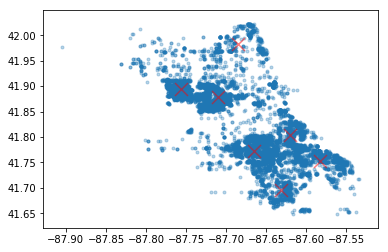

In [9]:
# visualize the clustering
plt.scatter(Z.Longitude, Z.Latitude, marker = '.', alpha = 0.3)
plt.scatter(centroids[:,0], centroids[:,1], marker='x', c='red', alpha=0.5, linewidths=3, s=169)
plt.show()

In [10]:
# slice the data to keep those occurred after 2011-01-01
idc = Y2.Date > '2011-01-01'
Z2 = Y2.loc[idc, ['Longitude', 'Latitude']]
# K-Means clustering on crime location
kmeans2 = KMeans(n_clusters = 7)
kmeans2.fit(Z2)
KMeans(n_clusters = 7, max_iter = 300, n_init = 10, init = 'k-means++', copy_x = True,
      n_jobs = 1, precompute_distances = 'auto', random_state = None, tol = 1e-4, verbose = 0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=7, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [11]:
centroids2 = kmeans2.cluster_centers_

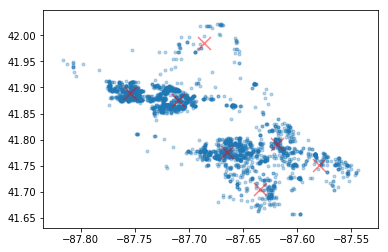

In [12]:
# visualize the clustering
plt.scatter(Z2.Longitude, Z2.Latitude, marker = '.', alpha = 0.3)
plt.scatter(centroids2[:,0], centroids2[:,1], marker='x', c='red', alpha=0.5, linewidths=3, s=169)
plt.show()